In [ ]:
# import necessary modules
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

# download file
from google.colab import drive
drive.mount('/content/gdrive')

Populating the interactive namespace from numpy and matplotlib
Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/data.csv')

### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [ ]:
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [ ]:
# count
print(df["order_id"].nunique())
# unique
print(df["item_name"].nunique())

1834
50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках?

In [ ]:
# print(df.isnull().any())
print(df.isna().any())

order_id              False
quantity              False
item_name             False
choice_description     True
item_price            False
dtype: bool


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [ ]:
df['choice_description'].fillna("", inplace=True)
print(df.isna().any())

order_id              False
quantity              False
item_name             False
choice_description    False
item_price            False
dtype: bool


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [ ]:
print(df['item_price'].dtype)
df['item_price(int)'] = pd.to_numeric(df['item_price'].str[1:])
print(df['item_price(int)'].dtype)
print(df['item_price(int)'])

object
float64
0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price(int), Length: 4622, dtype: float64


Какая средняя/минимальная/максимальная цена у товара?

In [ ]:
print(df['item_price(int)'].mean())
print(df['item_price(int)'].min())
print(df['item_price(int)'].max())

7.464335785374297
1.09
44.25


Удалите старую колонку с ценой.

In [ ]:
df.drop('item_price', axis=1, inplace=True)
df.tail()

,order_id,quantity,item_name,choice_description,item_price(int)
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [ ]:
df.sample(20)

,order_id,quantity,item_name,choice_description,item_price(int)
1709,691,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",9.25
3580,1436,1,Steak Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",8.99
1109,458,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1280,521,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
508,213,1,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), Rice]",8.99
1362,556,1,Chicken Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",10.98
2343,934,2,Chips,,4.30
4546,1807,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]",9.25
1013,416,1,Steak Burrito,[Tomatillo Red Chili Salsa],9.25
2438,968,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.75


In [ ]:
df['price_one'] = df.loc[:, 'item_price(int)'] / df.loc[:, 'quantity']

df2 = df.drop_duplicates("item_name")
df2.sort_values('price_one', inplace=True)
df2.head()

<ipython-input-30-3cdb608ee21b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values('price_one', inplace=True)


,order_id,quantity,item_name,choice_description,item_price(int),price_one
34,17,1,Bottled Water,,1.09,1.09
18,9,2,Canned Soda,[Sprite],2.18,1.09
263,114,1,Canned Soft Drink,[Coke],1.25,1.25
6,3,1,Side of Chips,,1.69,1.69
40,19,1,Chips,,2.15,2.15


In [ ]:
df2.tail()

,order_id,quantity,item_name,choice_description,item_price(int),price_one
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75,11.75
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,11.89
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,11.89


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [ ]:
df3 = df[df['item_name'] == 'Chicken Bowl'].groupby('order_id').agg({'quantity': 'sum'})
ccc = df3[df3['quantity'] > 1].shape[0]
print(ccc)

114


#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [ ]:
df4 = df.groupby('order_id').agg({'item_price(int)': 'sum', 'quantity': 'sum'})
print(df4['item_price(int)'].mean())
print(df4['quantity'].mean())

18.811428571428568
2.711014176663032


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [ ]:
df5 = df.groupby('order_id').agg({'quantity': 'sum'})
ccc = df5[df5['quantity'] == 1].shape[0]
print(ccc)

56


#### 9. [0.25 баллов] Какая самая популярная категория товара?

In [ ]:
df6 = df.groupby('item_name').agg({"quantity": "sum"})
df6.sort_values("quantity", ascending=False)
df6.head(1)

,quantity
item_name,
6 Pack Soft Drink,55


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [ ]:
df7 = df[df["item_name"].str.contains("Burrito")]
print(df7.groupby('item_name').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False))
print(df7.sort_values("price_one", ascending=False).head(1))

                  quantity
item_name                 
Chicken Burrito        591
Steak Burrito          386
Veggie Burrito          97
Barbacoa Burrito        91
Carnitas Burrito        60
Burrito                  6
   order_id  quantity      item_name  \
7         4         1  Steak Burrito   

                                  choice_description  item_price(int)  \
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...            11.75   

   price_one  
7      11.75  


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [ ]:
df8 = df.groupby('order_id').agg({'price_one': 'max', 'item_price(int)': 'sum'})
df8 = df8[df8['price_one'] > 0.4 * df8['item_price(int)']]
print(df8.shape[0])

1589


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [ ]:
df9 = df[df['choice_description'].str.contains('Diet Coke')]
print(df9['quantity'].sum())
print((1.35 / 1.25))
print((1.35 * df9['quantity'].sum()) / (1.25 * df9['quantity'].sum()) - 1)

159
1.08
0.08000000000000007


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [ ]:
data = np.random.rand(10, 3)

df10 = pd.DataFrame(data, columns=['index', 'column1', 'column2'])
df10.set_index('index', inplace=True)
print(df10)

           column1   column2
index                       
0.084569  0.430991  0.235021
0.806080  0.313276  0.775381
0.509141  0.819891  0.648280
0.749477  0.018974  0.519303
0.210545  0.389517  0.216154
0.131169  0.531256  0.039040
0.374273  0.568459  0.586191
0.775759  0.072639  0.647023
0.154299  0.141969  0.347701
0.964878  0.265993  0.868849


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [ ]:
df10.to_csv('/content/gdrive/My Drive/output.csv', index=False, header=False)

22222222222222222222222222222222222222222222

In [ ]:
%matplotlib inline
# нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [ ]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

In [ ]:
print(df)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price(int)  \
0                                                                   2.39   
1                                          

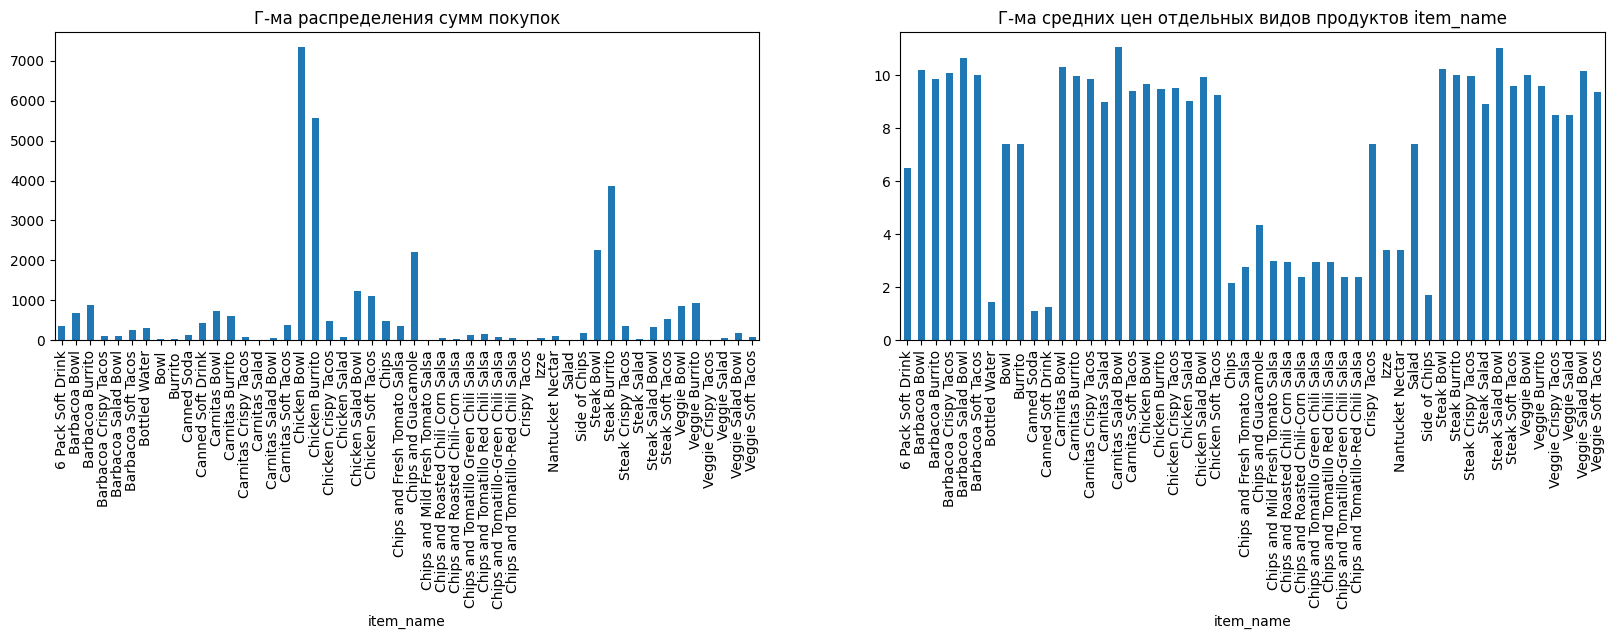

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title('Г-ма распределения сумм покупок')
df1_1 = df.groupby('item_name')['item_price(int)'].sum()
df1_1.plot(kind="bar", layout=(1, 2, 1))

plt.subplot(1, 2, 2)
plt.title('Г-ма средних цен отдельных видов продуктов item_name')
df1_2 = df.groupby('item_name')['price_one'].mean()
df1_2.plot(kind="bar", layout=(1, 2, 2))

plt.show()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

<Axes: xlabel='date'>

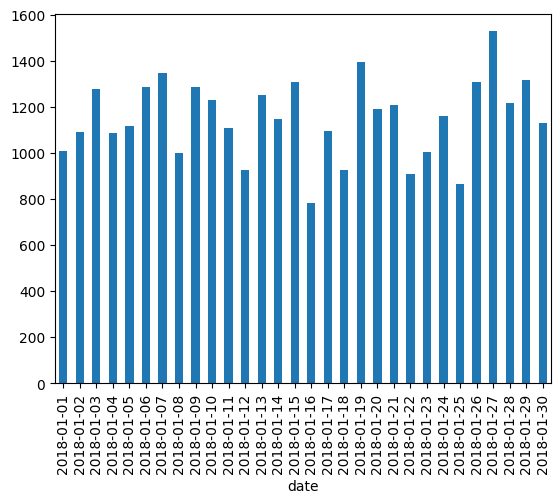

In [ ]:
df.groupby('date')['item_price(int)'].sum().plot(kind="bar")

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

In [ ]:
pd.to_datetime(df['date']).dt.weekday

0       1
1       1
2       1
3       1
4       2
       ..
4617    4
4618    4
4619    0
4620    0
4621    0
Name: date, Length: 4622, dtype: int64

<Axes: xlabel='day_of_date'>

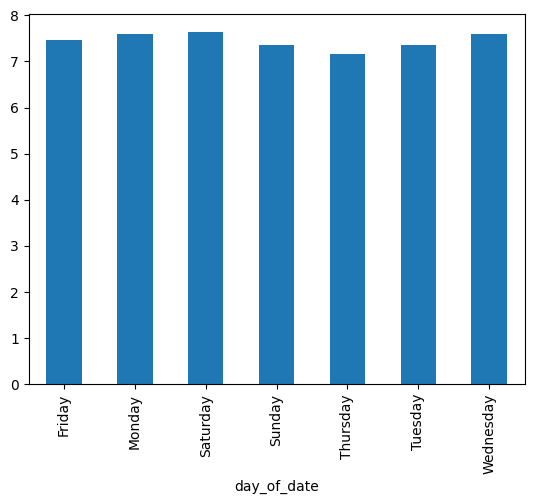

In [ ]:
df['day_of_date'] = df['date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").strftime("%A"))


df.groupby('day_of_date')['item_price(int)'].mean().plot(kind="bar")

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

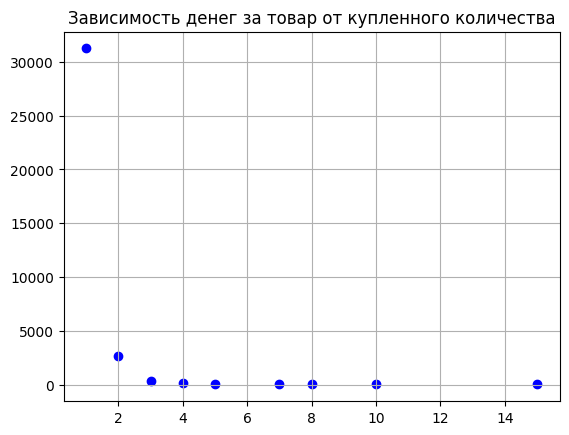

In [ ]:
grouped = df.groupby('quantity')['item_price(int)'].sum()
plt.scatter(grouped.index, grouped.values, marker='o', color='blue')
plt.title('Зависимость денег за товар от купленного количества')
plt.grid(True)
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [ ]:
plt.savefig('/content/gdrive/My Drive/output.pdf')

<Figure size 640x480 with 0 Axes>